In [108]:
%matplotlib inline

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from mpl_toolkits.mplot3d import Axes3D

In [70]:
train_data = np.loadtxt(open("data/train_data.csv", "rb"), delimiter=",")
train_labels = np.loadtxt(open("data/train_labels.csv", "rb"), delimiter=",")
test_data = np.loadtxt(open("data/test_data.csv", "rb"), delimiter=",")

In [140]:
labels = ['Pop_Rock',
            'Electronic',
            'Rap',
            'Jazz',
            'Latin',
            'RnB',
            'International',
            'Country',
            'Reggae',
            'Blues']

In [141]:
class_count = []
for i in range(len(labels)):
    print(labels[i] , '  ', sum(train_labels == i+1))
    class_count.append(sum(train_labels == i+1))

Pop_Rock    2178
Electronic    618
Rap    326
Jazz    253
Latin    214
RnB    260
International    141
Country    195
Reggae    92
Blues    86


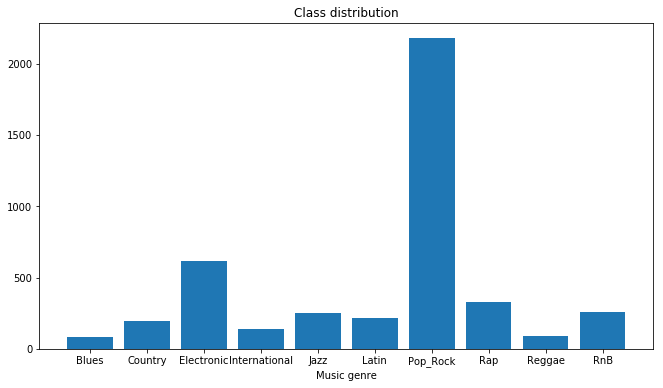

In [145]:
plt.figure(figsize=(11,6));
plt.bar(labels, class_count);
plt.title('Class distribution');
plt.xlabel('Music genre');
plt.savefig('./report_files/Class_distribution.png', dpi=300);

In [74]:
len(train_data)

4363

In [79]:
pca = PCA(n_components=3)
train_data_pca = pca.fit_transform(train_data)

In [194]:
ind = np.random.randint(train_data.shape[0], size=250)

xs_pca = train_data_pca[ind,0]
ys_pca = train_data_pca[ind,1]
zs_pca = train_data_pca[ind,2]
labels_pca = train_labels[ind]

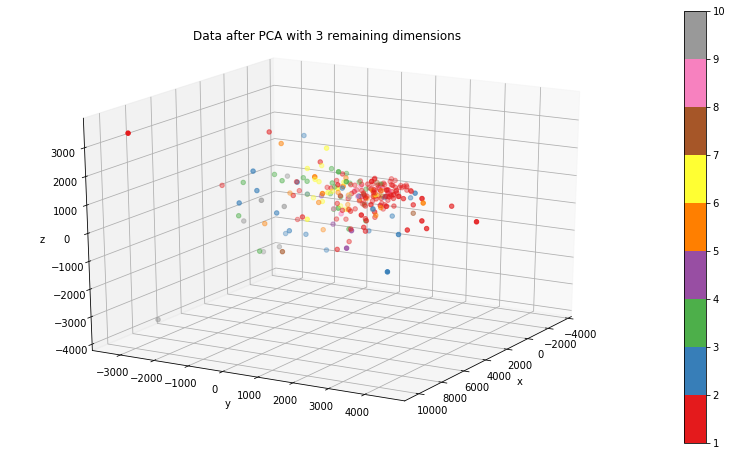

In [242]:
fig = plt.figure(figsize=(11,6))
#ax = fig.add_subplot(111, projection='3d')
ax = Axes3D(fig)
p = ax.scatter(xs_pca, ys_pca, zs_pca, c=labels_pca, cmap='Set1')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(azim=30, elev=20)
fig.colorbar(p)
ax.set_title('Data after PCA with 3 remaining dimensions')
plt.savefig('./report_files/PCA_data.png', dpi=300, bbox_inches='tight');

In [78]:
tsne = TSNE(3)
train_data_embedded = tsne.fit_transform(train_data)

In [231]:
ind = np.random.randint(train_data.shape[0],   ))

xs_tsne = train_data_embedded[ind,0]
ys_tsne = train_data_embedded[ind,1]
zs_tsne = train_data_embedded[ind,2]
labels_tsne = train_labels[ind]

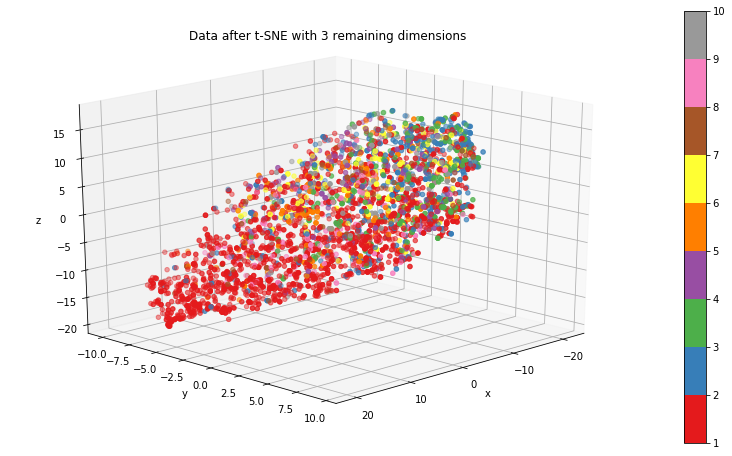

In [243]:
fig = plt.figure(figsize=(11,6))
#ax = fig.add_subplot(111, projection='3d')
ax = Axes3D(fig)
p = ax.scatter(xs_tsne, ys_tsne, zs_tsne, c=labels_tsne, cmap='Set1')
ax.view_init(azim=45, elev=20)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
fig.colorbar(p)
ax.set_title('Data after t-SNE with 3 remaining dimensions')
plt.savefig('./report_files/TSNE_data.png', dpi=300, bbox_inches='tight');

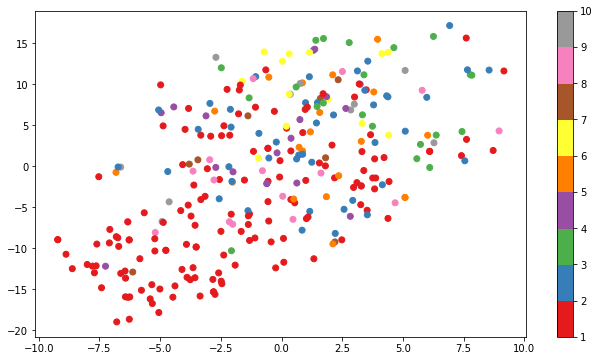

In [192]:
plt.figure(figsize=(11,6));
plt.scatter(ys_tsne, zs_tsne, c=labels_tsne, cmap='Set1');
plt.colorbar();

In [3]:
import plotly
#from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.plotly as py
import plotly.graph_objs as go
from IPython.display import Image

py.sign_in('MaximilianProll', 'gSly09gNcJ7EhkYkSdVS')
#init_notebook_mode(connected=True)

In [48]:
data = [go.Bar(
            x=labels,
            y=class_count
)]

In [49]:
#data = [go.Histogram(x=train_labels)]

layout = go.Layout(
    title='Class distribution',
    xaxis=dict(
        title='Class'
    ),
    yaxis=dict(
        title='Count'
    ),
    bargap=0.1,
    bargroupgap=0.1
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig,filename='Class_distribution', image='png')

In [7]:
py.image.save_as(fig, filename='./report_files/Class_distribution.png', scale=8)

In [1]:
import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np
x0 = np.random.randn(500)
x1 = np.random.randn(500)+1

trace1 = go.Histogram(
    x=x0,
    histnorm='count',
    name='control',
    xbins=dict(
        start=-4.0,
        end=3.0,
        size=0.5
    ),
    marker=dict(
        color='#FFD7E9',
    ),
    opacity=0.75
)
trace2 = go.Histogram(
    x=x1,
    name='experimental',
    xbins=dict(
        start=-3.0,
        end=4,
        size=0.5
    ),
    marker=dict(
        color='#EB89B5'
    ),
    opacity=0.75
)
data = [trace1, trace2]

layout = go.Layout(
    title='Sampled Results',
    xaxis=dict(
        title='Value'
    ),
    yaxis=dict(
        title='Count'
    ),
    bargap=0.2,
    bargroupgap=0.1
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='styled histogram')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~MaximilianProll/0 or inside your plot.ly account where it is named 'styled histogram'
